#  Exploratory Modeling - 1st Edition

In [1]:
from src.transforming import transform

help(transform)

Help on function transform in module src.transforming:

transform()
    This function transforms the csv file that was fetched previously.
    The dataset contains game data for each team and each season from 1994-2022.
    The function prepares the dataset for modeling.
    All categorical columns will be converted into numerical data types.



In [2]:
#df = transform()

In [3]:
# common imports
import requests
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys

In [4]:
# Importing data from csv file
path = "/Users/mirror/Desktop/GitHub/nfl_game_predictor/data/transformed.csv"
df = pd.read_csv(path)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df

,season,team_code,week,day,month,day_of_month,hour,win_count,loss_count,opp_code,...,result_rolling,points_scored_rolling,points_allowed_rolling,totyd_rolling,to_rolling,totyd_allowed_rolling,to_forced_rolling,off_exp_pts_rolling,def_exp_pts_rolling,sts_exp_pts_rolling
0,1994,0,5,6,10,2,16,1,3,20,...,0.25,11.50,18.25,258.75,2.75,259.50,2.50,-14.1225,7.6750,2.9600
1,1994,0,6,6,10,9,16,1,4,8,...,0.25,9.25,24.25,255.50,3.25,309.25,2.00,-16.9475,0.2700,3.9425
2,1994,0,7,6,10,16,13,2,4,31,...,0.50,9.75,23.25,293.00,3.25,316.25,2.75,-17.5550,7.3875,1.8750
3,1994,0,8,6,10,23,16,2,5,8,...,0.50,15.00,22.25,292.25,2.50,313.75,2.25,-10.5900,5.3700,2.3050
4,1994,0,9,6,10,30,20,3,5,26,...,0.50,15.75,24.75,298.75,2.25,303.50,2.00,-10.1350,3.6550,0.7575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,2022,31,4,6,10,2,13,1,3,8,...,0.25,18.25,26.75,330.75,1.75,371.75,0.25,-4.0950,-6.1525,0.5475
12257,2022,31,5,6,10,9,13,1,4,30,...,0.00,15.50,26.50,329.50,1.25,336.25,0.00,-6.2225,-5.3050,-0.4250
12258,2022,31,6,3,10,13,20,2,4,5,...,0.25,11.75,19.25,284.00,1.00,327.75,0.50,-9.4900,-2.9675,3.7075
12259,2022,31,7,6,10,23,13,3,4,11,...,0.50,15.50,18.50,315.00,1.00,285.75,0.75,-4.7425,-1.0125,1.6200


In [7]:
# importing packages
import pandas as pd
import numpy as np
import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

### Preparing Data for Modeling

In [8]:
# assigning features and targets
X = df.drop(['result', 'win_count', 'loss_count', 'ot', 'points_scored', 'points_allowed', 'sts_exp_pts', 
             '1st_downs', 'totyd', 'passyd', 'rushyd', 'to', '1st_downs_allowed', 'def_exp_pts', 
             'totyd_allowed', 'passyd_allowed', 'rushyd_allowed', 'to_forced', 'off_exp_pts'], axis = 1)
y = df["result"]

In [9]:
X

,season,team_code,week,day,month,day_of_month,hour,opp_code,home_team,result_rolling,points_scored_rolling,points_allowed_rolling,totyd_rolling,to_rolling,totyd_allowed_rolling,to_forced_rolling,off_exp_pts_rolling,def_exp_pts_rolling,sts_exp_pts_rolling
0,1994,0,5,6,10,2,16,20,1,0.25,11.50,18.25,258.75,2.75,259.50,2.50,-14.1225,7.6750,2.9600
1,1994,0,6,6,10,9,16,8,0,0.25,9.25,24.25,255.50,3.25,309.25,2.00,-16.9475,0.2700,3.9425
2,1994,0,7,6,10,16,13,31,0,0.50,9.75,23.25,293.00,3.25,316.25,2.75,-17.5550,7.3875,1.8750
3,1994,0,8,6,10,23,16,8,1,0.50,15.00,22.25,292.25,2.50,313.75,2.25,-10.5900,5.3700,2.3050
4,1994,0,9,6,10,30,20,26,1,0.50,15.75,24.75,298.75,2.25,303.50,2.00,-10.1350,3.6550,0.7575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12256,2022,31,4,6,10,2,13,8,0,0.25,18.25,26.75,330.75,1.75,371.75,0.25,-4.0950,-6.1525,0.5475
12257,2022,31,5,6,10,9,13,30,1,0.00,15.50,26.50,329.50,1.25,336.25,0.00,-6.2225,-5.3050,-0.4250
12258,2022,31,6,3,10,13,20,5,0,0.25,11.75,19.25,284.00,1.00,327.75,0.50,-9.4900,-2.9675,3.7075
12259,2022,31,7,6,10,23,13,11,1,0.50,15.50,18.50,315.00,1.00,285.75,0.75,-4.7425,-1.0125,1.6200


In [10]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
y_train

5903     1
5501     0
5865     0
10825    1
8722     0
        ..
11964    1
5191     1
5390     1
860      0
7270     0
Name: result, Length: 9808, dtype: int64

### First Model - Decision Tree Classifier

In [12]:
# creating the decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# predicting on the test set
tree_clf_pred = tree_clf.predict(X_test)

In [14]:
# evaluating the accuracy
acc_score = accuracy_score(y_true=y_test, y_pred=tree_clf_pred)
prec_score = precision_score(y_true=y_test, y_pred=tree_clf_pred, average='micro')
recall_score = recall_score(y_true=y_test, y_pred=tree_clf_pred, average='micro')
print('Accuracy = %s' % (acc_score))
print('Precision = %s' % (prec_score))
print('Recall = %s' % (recall_score))

Accuracy = 0.6689767631471667
Precision = 0.6689767631471667
Recall = 0.6689767631471667


In [15]:
tree_clf.score(X_test, y_test)

0.6689767631471667

In [16]:
# generalization error for decision tree test sets
print('The generalization effor for the Decision Tree model is', round(mean_squared_error(y_true=y_test, y_pred=tree_clf_pred), 5))

The generalization effor for the Decision Tree model is 0.33102


In [17]:
print(confusion_matrix(tree_clf_pred, y_test))

[[825 417]
 [395 816]]


In [18]:
print(classification_report(tree_clf_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1242
           1       0.66      0.67      0.67      1211

    accuracy                           0.67      2453
   macro avg       0.67      0.67      0.67      2453
weighted avg       0.67      0.67      0.67      2453



In [20]:
X.corrwith(y, axis = 0)

season                   -0.000244
team_code                 0.034403
week                      0.000857
day                      -0.000045
month                    -0.000328
day_of_month             -0.000229
hour                      0.000914
opp_code                 -0.037064
home_team                 0.149980
result_rolling            0.556675
points_scored_rolling     0.348010
points_allowed_rolling   -0.333696
totyd_rolling             0.220541
to_rolling               -0.247508
totyd_allowed_rolling    -0.183524
to_forced_rolling         0.217968
off_exp_pts_rolling       0.298996
def_exp_pts_rolling       0.251944
sts_exp_pts_rolling      -0.046225
dtype: float64

In [21]:
# creating grid_search dictionary for the decision tree classifier
param_grid = {'max_depth' : [4,5,6,8,10], 'max_leaf_nodes' : list(range(2, 50)), 'min_samples_split' : [2]}

In [22]:
# instantiating gridsearch
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   15.4s finished


#### On this dataset, the optimal model parameters for the `Decision Tree Classifier` class are:

- `max_leaf_nodes = 8`
- `max_depth = 4`
- `min_samples_split = 2`

In [23]:
# instantiating new decision tree classifier with the best parameter attributes
new_tree_clf = DecisionTreeClassifier(random_state=42, max_depth = grid_search_cv.best_params_['max_depth'],
                                      max_leaf_nodes = grid_search_cv.best_params_['max_leaf_nodes'], 
                                      min_samples_split = grid_search_cv.best_params_['min_samples_split'])
# fitting the new tree
new_tree_clf.fit(X_train, y_train)

new_tree_clf_pred = new_tree_clf.predict(X_test)

In [24]:
# calling the score classes on the new model
new_acc_score = accuracy_score(y_true=y_test, y_pred=new_tree_clf_pred)
new_prec_score = precision_score(y_true=y_test, y_pred=new_tree_clf_pred, average='micro')
#new_recall_score = recall_score(y_true=y_test, y_pred=new_tree_clf_pred, average='micro')

print('Accuracy = %s' % (new_acc_score))
print('Precision = %s' % (new_prec_score))
#print('Recall = %s' % (new_recall_score))

Accuracy = 0.7496942519364044
Precision = 0.7496942519364044


In [25]:
new_tree_clf.score(X_test, y_test)

0.7496942519364044

In [26]:
# generalization error for gbr test sets
print('The generalization effor for the new Decision Tree model is', round(mean_squared_error(y_true=y_test, y_pred=new_tree_clf_pred), 5))

The generalization effor for the new Decision Tree model is 0.25031


In [27]:
print(confusion_matrix(new_tree_clf_pred, y_test))

[[905 299]
 [315 934]]


In [28]:
print(classification_report(new_tree_clf_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1204
           1       0.76      0.75      0.75      1249

    accuracy                           0.75      2453
   macro avg       0.75      0.75      0.75      2453
weighted avg       0.75      0.75      0.75      2453



In [29]:
# manual confusion matrix
combined = pd.DataFrame(dict(actual=y_test, prediction=new_tree_clf_pred))
pd.crosstab(index=combined['actual'], columns=combined['prediction'])

prediction,0,1
actual,,
0,905,315
1,299,934


In [30]:
# tree as text
#cols = df.columns.tolist()
feats = X.columns.tolist()
r = export_text(tree_clf, feature_names=feats)
print(r)

|--- result_rolling <= 0.62
|   |--- result_rolling <= 0.38
|   |   |--- result_rolling <= 0.12
|   |   |   |--- class: 0
|   |   |--- result_rolling >  0.12
|   |   |   |--- home_team <= 0.50
|   |   |   |   |--- off_exp_pts_rolling <= -4.72
|   |   |   |   |   |--- sts_exp_pts_rolling <= 1.78
|   |   |   |   |   |   |--- def_exp_pts_rolling <= 0.18
|   |   |   |   |   |   |   |--- points_scored_rolling <= 9.62
|   |   |   |   |   |   |   |   |--- opp_code <= 10.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- opp_code >  10.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- points_scored_rolling >  9.62
|   |   |   |   |   |   |   |   |--- opp_code <= 4.50
|   |   |   |   |   |   |   |   |   |--- totyd_rolling <= 317.75
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- totyd_rolling >  317.75
|   |   |   |   |   |   |   |   |   |   |--- totyd_rolling <= 331.62
|   

[Text(202.56117700988716, 214.6523076923077, 'X[9] <= 0.625\ngini = 0.5\nsamples = 9808\nvalue = [4922, 4886]'),
 Text(103.19719690061261, 209.07692307692307, 'X[9] <= 0.375\ngini = 0.437\nsamples = 6260\nvalue = [4239, 2021]'),
 Text(39.647980201113086, 203.50153846153847, 'X[9] <= 0.125\ngini = 0.293\nsamples = 3228\nvalue = [2652, 576]'),
 Text(39.392349750510014, 197.92615384615385, 'gini = 0.0\nsamples = 910\nvalue = [910, 0]'),
 Text(39.90361065171616, 197.92615384615385, 'X[8] <= 0.5\ngini = 0.373\nsamples = 2318\nvalue = [1742, 576]'),
 Text(14.203966189856956, 192.35076923076923, 'X[16] <= -4.716\ngini = 0.29\nsamples = 1226\nvalue = [1010, 216]'),
 Text(7.85963779959676, 186.7753846153846, 'X[18] <= 1.777\ngini = 0.239\nsamples = 532\nvalue = [458, 74]'),
 Text(2.756015795564357, 181.2, 'X[17] <= 0.182\ngini = 0.176\nsamples = 317\nvalue = [286, 31]'),
 Text(1.0225218024122833, 175.6246153846154, 'X[10] <= 9.625\ngini = 0.054\nsamples = 108\nvalue = [105, 3]'),
 Text(0.511260

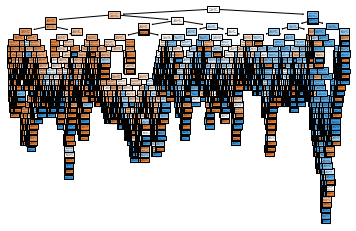

In [31]:
# tree as an image
tree.plot_tree(tree_clf, filled=True)